# Visualizations of results from Cifar10

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
from pandas.core.common import SettingWithCopyWarning
import plotly.express as px

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Auxiliary functions

In [16]:
def read_confs(featureaug = 'False',
                 bs = '768',
                 numepochs = '1500',
                 lr = '0.1',
                 optim = 'SGD',
                 mu = '0.0',
                 musize = '0.0',
                 tralpha = '0.1',
                 trperc = '0.2',
                 es = 'True',
                 method = 'RandomErasing',
                 scales = '0.8',
                 seeds = ['800'], 
                 baseloss = 'crossentropy',
                 ntrsamples = '3000',
                 model = 'resnet18',
                 results_store = None,
                 calalpha='0.1',
                 calperc = '0.2',
                 path_root = '/content/test_conf',
                 mod = 'new'):
  path = 'feataug={}_bs={}_numepochs={}_lr={}_optim={}_mu={}_musize={}_tralpha={}_es={}_method={}_scales={}_trperc={}_seed={}_baseloss={}_ntrsamp={}_model={}_calalpha={}_calperc={}'.\
  format(featureaug, bs, numepochs, lr, optim, mu, musize, tralpha, es, method, scales, trperc, seeds, baseloss, ntrsamples, model, calalpha, calperc)

  path_full = path_root+'/sc_results_'+path+'_confs.pickle'

  # print(path_full)
  box_results = open(path_full,'rb')
  results_store = pickle.load(box_results)
  return results_store

  
def read_results(featureaug = 'False',
                 bs = '768',
                 numepochs = '1500',
                 lr = '0.1',
                 optim = 'SGD',
                 mu = '0.0',
                 musize = '0.0',
                 tralpha = '0.1',
                 trperc = '0.2',
                 es = 'True',
                 method = 'RandomErasing',
                 scales = '0.8',
                 seeds = ['800','877','2333','1325','22142','76542','87658','133215','998888','765183'], 
                 baseloss = 'crossentropy',
                 ntrsamples = '3000',
                 model = 'resnet18',
                 results_store = None,
                 Model_name = None,
                 es_models = 'all',
                 calalpha='0.1',
                 calperc = '0.2',
                 alter_name = None, 
                 path_root = '/content/test_large',
                 mod = 'new'):
  
  if results_store is None or results_store.empty:
    results_store = pd.DataFrame()
  
  for seed in seeds:

    if Model_name is None:
      print('Model name is needed! Program breaks')
      break
      
    if alter_name == 'by_label':
      path = 'feataug={}_bs={}_numepochs={}_lr={}_optim={}_mu={}_musize={}_tralpha={}_es={}_method={}_scales={}_trperc={}_seed={}_baseloss={}_ntrsamp={}_model={}_calalpha={}_calperc={}_lf'.\
            format(featureaug, bs, numepochs, lr, optim, mu, musize, tralpha, es, method, scales, trperc, seed, baseloss, ntrsamples, model, calalpha, calperc)  
    else:
      path = 'feataug={}_bs={}_numepochs={}_lr={}_optim={}_mu={}_musize={}_tralpha={}_es={}_method={}_scales={}_trperc={}_seed={}_baseloss={}_ntrsamp={}_model={}_calalpha={}_calperc={}'.\
            format(featureaug, bs, numepochs, lr, optim, mu, musize, tralpha, es, method, scales, trperc, seed, baseloss, ntrsamples, model, calalpha, calperc)


    box_results = pd.read_csv(path_root+'/sc_results_'+path+'.csv')
    # print('read file '+ path_root+'/sc_results_'+path+'.csv')
    box_results['Model_renamed'] = Model_name
    
    if es_models == 'all':
      box_results.loc[box_results['Model'] == 'bbox_es_loss','Model_renamed'] = '{}_ES_loss'.format(Model_name)
      box_results.loc[box_results['Model'] == 'bbox_es_acc','Model_renamed'] = '{}_ES_acc'.format(Model_name)

    elif es_models == 'fully':
      box_results = box_results[box_results['Model'] == 'bbox']

    elif es_models == 'es_acc':
      box_results = box_results[box_results['Model'] == 'bbox_es_acc']
      box_results.loc[box_results['Model'] == 'bbox_es_acc','Model_renamed'] = '{}_ES_acc'.format(Model_name)
      
    elif es_models == 'es_loss':
      box_results = box_results[box_results['Model'] == 'bbox_es_loss']
      box_results.loc[box_results['Model'] == 'bbox_es_loss','Model_renamed'] = '{}_ES_loss'.format(Model_name) 


    results_store = pd.concat([results_store,box_results])

  return results_store

def cvm(u):
  """
  Compute the Cramer von Mises statistic for testing uniformity in distribution
  """
  n = len(u)
  u_sorted = np.sort(u)
  i_seq = (2.0*np.arange(1,1+n)-1.0)/(2.0*n)
  stat = np.sum(np.square(i_seq - u_sorted)) + 1.0/(12.0*n)
  return stat

def KS(u):
  # u numpy array
  n = len(u)
  u_sorted = np.sort(u)
  i_seq = np.arange(1.0,1.0+n)/(n)
  out = np.max(np.abs(i_seq - u_sorted))
  return out

#### Figure 1: Varying number of training samples

In [5]:
# Load all evaluation results
results_3000 = read_results(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', bs = '128', trperc='0.2', Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', path_root = '/content/test_new')
results_3000 = read_results(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', bs = '128', trperc='0.2', Model_name = 'Focal', es_models = 'all', baseloss = 'focalloss', results_store = results_3000, calalpha='0.1', calperc='0.2', path_root = '/content/test_new')
results_3000 = read_results(numepochs = '5000', lr = '0.001', optim = 'Adam', mu = '0.0', musize= '0.2', bs = '768', trperc='0.2', Model_name = 'Hybrid', es_models = 'all', results_store = results_3000, calalpha='0.1', calperc='0.2', path_root = '/content/test_new')
results_3000 = read_results(numepochs = '5000', lr = '0.001', optim = 'Adam', mu = '0.1', bs = '768', trperc='0.2', Model_name = 'Conformal', es_models = 'all', results_store = results_3000, calalpha='0.1', calperc='0.2', path_root = '/content/test_new')

results_10000 = read_results(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='10000', bs = '128', trperc='0.2', Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', path_root = '/content/test_new')
results_10000 = read_results(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='10000', bs = '128', trperc='0.2', Model_name = 'Focal', baseloss = 'focalloss', es_models = 'all', results_store = results_10000, calalpha='0.1', calperc='0.2', path_root = '/content/test_new')
results_10000 = read_results(numepochs = '5000', lr = '0.001', optim = 'Adam', mu = '0.0', ntrsamples='10000',musize= '0.2', bs = '768', trperc='0.2', Model_name = 'Hybrid', es_models = 'all', results_store = results_10000, calalpha='0.1', calperc='0.2', path_root = '/content/test_new')
results_10000 = read_results(numepochs = '4000', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='10000', bs = '768', trperc='0.2', Model_name = 'Conformal', es_models = 'all', results_store = results_10000, calalpha='0.1', calperc='0.2', path_root = '/content/test_new')

results_16500 = read_results(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='16500', bs = '128', trperc='0.2', Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['100001','999','46233','22145','6771','2333','531','2','98908','76542'])
results_16500 = read_results(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='16500', bs = '128', trperc='0.2', Model_name = 'Focal',baseloss = 'focalloss', es_models = 'all', results_store = results_16500, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['100001','999','46233','22145','6771','2333','531','2','98908','76542'])
results_16500 = read_results(numepochs = '3800', lr = '0.001', optim = 'Adam', mu = '0.0', ntrsamples='16500',musize= '0.2', bs = '768', trperc='0.2', Model_name = 'Hybrid', es_models = 'all', results_store = results_16500, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['100001','999','46233','22145','6771','2333','531','2','98908','76542'])
results_16500 = read_results(numepochs = '3500', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='16500', bs = '768', trperc='0.2', Model_name = 'Conformal', es_models = 'all', results_store = results_16500, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['100001','46233','22145','6771','2333','531','2','98908','76542','999'])

results_27500 = read_results(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='27500', bs = '128', trperc='0.2', Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['15', '3891', '21', '130502', '771', '8', '256', '819', '1955', '97667'])
results_27500 = read_results(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='27500', bs = '128', trperc='0.2', Model_name = 'Focal',baseloss = 'focalloss', es_models = 'all', results_store = results_27500, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['15', '3891', '21', '130502', '771', '8', '256', '819', '1955', '97667'])
results_27500 = read_results(numepochs = '3500', lr = '0.001', optim = 'Adam', mu = '0.0', ntrsamples='27500',musize= '0.2', bs = '768', trperc='0.2', Model_name = 'Hybrid', es_models = 'all', results_store = results_27500, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['15', '3891', '21', '130502', '771', '8', '256', '819', '1955', '97667'])
results_27500 = read_results(numepochs = '3200', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='27500', bs = '768', trperc='0.2', Model_name = 'Conformal', es_models = 'all', results_store = results_27500, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds = ['15', '3891', '21', '130502', '771', '8', '256', '819', '1955', '97667'])


results_45000 = read_results(numepochs = '1000', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='27500', bs = '128', trperc='0.2', Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['1','2','3','4','800','877','22142','76542','133215','998888']['1','2','3','4','800','877','22142','76542','133215','998888'])
results_45000 = read_results(numepochs = '1000', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='27500', bs = '128', trperc='0.2', Model_name = 'Focal',baseloss = 'focalloss', es_models = 'all', results_store = results_45000, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['1','2','3','4','800','877','22142','76542','133215','998888'])
results_45000 = read_results(numepochs = '2000', lr = '0.001', optim = 'Adam', mu = '0.0', ntrsamples='27500',musize= '0.2', bs = '768', trperc='0.2', Model_name = 'Hybrid', es_models = 'all', results_store = results_45000, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['1','2','3','4','800','877','22142','76542','133215','998888'])
results_45000 = read_results(numepochs = '3000', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='27500', bs = '768', trperc='0.2', Model_name = 'Conformal', es_models = 'all', results_store = results_45000, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds = ['1','2','3','4','800','877','22142','76542','133215','998888'])

In [11]:
results_3000_final = results_3000.groupby(['Model_renamed','Flag']).agg({'Coverage':'median',
                                                                         'Model':'first',
                                                                         'Test Acc':'median',
                                                                         'Size (mean)':'median'}).reset_index()
results_3000_final['ntrsamples'] = 3000

results_10000_final = results_10000.groupby(['Model_renamed','Flag']).agg({'Coverage':'median',
                                                                           'Model':'first',
                                                                           'Test Acc':'median',
                                                                           'Size (mean)':'median'}).reset_index()
results_10000_final['ntrsamples'] = 10000

results_16500_final = results_16500.groupby(['Model_renamed','Flag']).agg({'Coverage':'median',
                                                                           'Model':'first',
                                                                           'Test Acc':'median',
                                                                           'Size (mean)':'median'}).reset_index()
results_16500_final['ntrsamples'] = 16500

results_27500_final = results_27500.groupby(['Model_renamed','Flag']).agg({'Coverage':'median',
                                                                           'Model':'first',
                                                                           'Test Acc':'median',
                                                                           'Size (mean)':'median'}).reset_index()
results_27500_final['ntrsamples'] = 27500

results_45000_final = results_45000.groupby(['Model_renamed','Flag']).agg({'Coverage':'median',
                                                                           'Model':'first',
                                                                           'Test Acc':'median',
                                                                           'Size (mean)':'median'}).reset_index()
results_45000_final['ntrsamples'] = 45000

results_final = pd.concat([results_3000_final,results_10000_final, results_16500_final, results_27500_final, results_45000_final])
results_final.Flag.replace('1.0','Corrupt images', inplace = True)
results_final.Flag.replace('0.0','Intact images', inplace = True)
results_final.Flag.replace('All','All images', inplace = True)
results_final.rename(columns = {'Size (mean)': 'Size'}, inplace = True)
results_final

,Model_renamed,Flag,Coverage,Model,Test Acc,Size,ntrsamples
0,Cross-Entropy,Intact images,0.908569,bbox,0.415438,6.125031,3000
1,Cross-Entropy,Corrupt images,0.865597,bbox,0.275326,6.648445,3000
2,Cross-Entropy,All images,0.899300,bbox,0.390300,6.252500,3000
3,Cross-Entropy_ES_acc,Intact images,0.921559,bbox_es_acc,0.525481,4.311391,3000
4,Cross-Entropy_ES_acc,Corrupt images,0.835005,bbox_es_acc,0.225176,6.732698,3000
...,...,...,...,...,...,...,...
31,Conformal_ES_acc,Corrupt images,0.874150,bbox_es_acc,0.353050,6.091250,45000
32,Conformal_ES_acc,All images,0.899900,bbox_es_acc,0.724400,2.341600,45000
33,Conformal_ES_loss,Intact images,0.935900,bbox_es_loss,0.787450,1.855100,45000
34,Conformal_ES_loss,Corrupt images,0.793400,bbox_es_loss,0.291900,5.115350,45000


##### on Fully-Trained Models

In [ ]:
def plot_figure1(df, model, x, y, title, file_name = None, save = False):

  font_size = 18
  tick_size = 12
  lab_pad = 12

  df_sub = df.loc[df['Model'] == model]
  df_sub.loc[df_sub['Model_renamed'].str.contains('Cross-Entropy'), 'Model_renamed'] = 'Cross entropy'
  df_sub.loc[df_sub['Model_renamed'].str.contains('Conformal'), 'Model_renamed'] = 'Conformal'
  df_sub.loc[df_sub['Model_renamed'].str.contains('Focal'), 'Model_renamed'] = 'Focal'
  df_sub.loc[df_sub['Model_renamed'].str.contains('Hybrid'), 'Model_renamed'] = 'Hybrid'

  Easy = df_sub[df_sub['Flag']== 'Intact images']
  Hard = df_sub[df_sub['Flag']== 'Corrupt images']
  All = df_sub[df_sub['Flag']== 'All images']

  fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey = 'row')
  ax[0].plot(Easy[Easy['Model_renamed'] == 'Conformal'][x], Easy[Easy['Model_renamed'] == 'Conformal'][y], 'X-b', label='Conformal')
  ax[0].plot(Easy[Easy['Model_renamed'] == 'Hybrid'][x], Easy[Easy['Model_renamed'] == 'Hybrid'][y], 'o-k', label='Hybrid')
  ax[0].plot(Easy[Easy['Model_renamed'] == 'Cross entropy'][x], Easy[Easy['Model_renamed'] == 'Cross entropy'][y], '*-g', label='Cross entropy')
  ax[0].plot(Easy[Easy['Model_renamed'] == 'Focal'][x], Easy[Easy['Model_renamed'] == 'Focal'][y], 's-y', label='Focal')

  ax[1].plot(Hard[Hard['Model_renamed'] == 'Conformal'][x], Hard[Hard['Model_renamed'] == 'Conformal'][y], 'X-b', label='Conformal')
  ax[1].plot(Hard[Hard['Model_renamed'] == 'Hybrid'][x], Hard[Hard['Model_renamed'] == 'Hybrid'][y], 'o-k', label='Hybrid')
  ax[1].plot(Hard[Hard['Model_renamed'] == 'Cross entropy'][x], Hard[Hard['Model_renamed'] == 'Cross entropy'][y], '*-g', label='Cross entropy')
  ax[1].plot(Hard[Hard['Model_renamed'] == 'Focal'][x], Hard[Hard['Model_renamed'] == 'Focal'][y], 's-y', label='Focal')

  ax[2].plot(All[All['Model_renamed'] == 'Conformal'][x], All[All['Model_renamed'] == 'Conformal'][y], 'X-b', label='Conformal')
  ax[2].plot(All[All['Model_renamed'] == 'Hybrid'][x], All[All['Model_renamed'] == 'Hybrid'][y], 'o-k', label='Hybrid')
  ax[2].plot(All[All['Model_renamed'] == 'Cross entropy'][x], All[All['Model_renamed'] == 'Cross entropy'][y], '*-g', label='Cross entropy')
  ax[2].plot(All[All['Model_renamed'] == 'Focal'][x], All[All['Model_renamed'] == 'Focal'][y], 's-y', label='Focal')

  ax[0].set_title('Intact images', fontsize=font_size)
  ax[1].set_title('Corrupt images', fontsize=font_size)
  ax[2].set_title('All images', fontsize=font_size)

  ax[0].set_xlabel('Number of training samples', fontsize=font_size, labelpad= lab_pad)
  ax[0].set_ylabel(y, fontsize=font_size, labelpad= lab_pad)
  ax[0].set_xscale('log')
  ax[0].set_xticks([3000, 10000, 16500, 27500, 45000])
  ax[0].legend().set_visible(False)
  ax[0].set_xticklabels(['3000', '10000', '16500', '27500', '45000'], fontsize = tick_size)
  ax[0].tick_params(axis='y', labelsize=tick_size)
  ax[0].grid()

  ax[1].set_xlabel('Number of training samples', fontsize=font_size, labelpad= lab_pad)
  ax[1].set_xscale('log')
  ax[1].set_xticks([3000, 10000, 16500, 27500, 45000])
  ax[1].set_xticklabels(['3000', '10000', '16500', '27500', '45000'], fontsize = tick_size)
  if y == 'Size':
    ax[1].set_yticks([2,3,4,5,6,7,8])
  ax[1].tick_params(axis='y', labelsize=tick_size)
  ax[1].grid()

  ax[2].set_xlabel('Number of training samples', fontsize=font_size, labelpad= lab_pad)
  ax[2].set_xscale('log')
  ax[2].set_xticks([3000, 10000, 16500, 27500, 45000])
  ax[2].set_xticklabels(['3000', '10000', '16500', '27500', '45000'], fontsize = tick_size)
  if y == 'Test Acc':
    ax[1].set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
  ax[2].tick_params(axis='y', labelsize=tick_size)
  ax[2].legend()
  ax[2].grid()

  plt.subplots_adjust(wspace=0.1, hspace=2)
  plt.legend(bbox_to_anchor =(1.05, 1.035), fontsize = tick_size)

  if save:
    filename = file_name + '.pdf'
    plt.savefig( filename, bbox_inches = 'tight')

  fig.show()

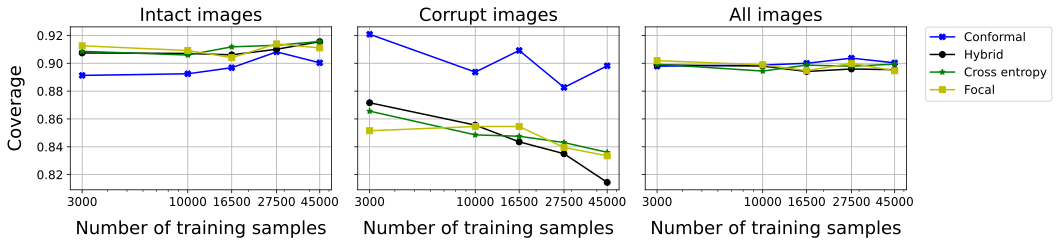

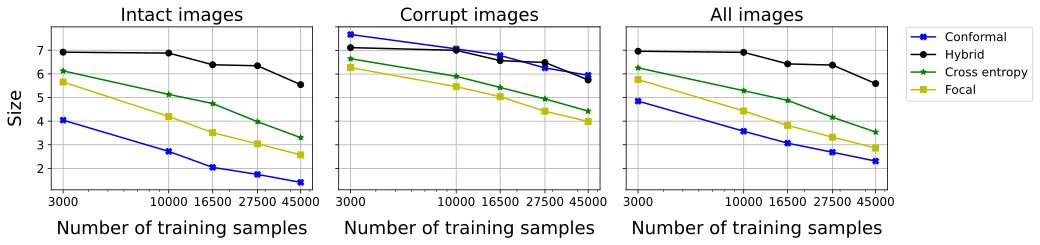

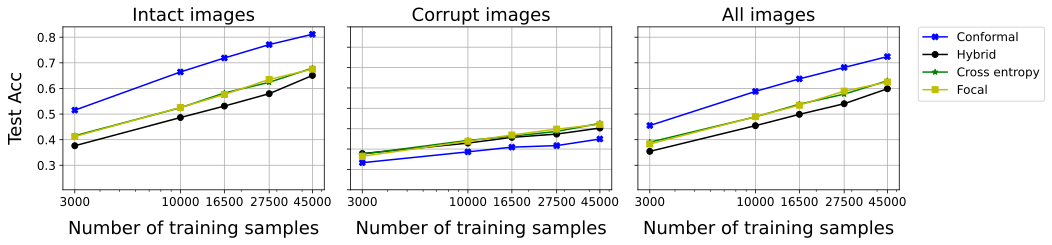

In [ ]:
plot_figure1(results_final, 'bbox', 'ntrsamples', 'Coverage', title = 'Fully trained models', file_name = 'full_cov_p1_V4', save = True)
plot_figure1(results_final, 'bbox', 'ntrsamples', 'Size',     title = 'Fully trained models', file_name = 'full_size_p1_V4', save = True)
plot_figure1(results_final, 'bbox', 'ntrsamples', 'Test Acc', title = 'Fully trained models', file_name = 'full_acc_p1_V4', save = True)

##### on Early-Stopping (according to accuracy) models

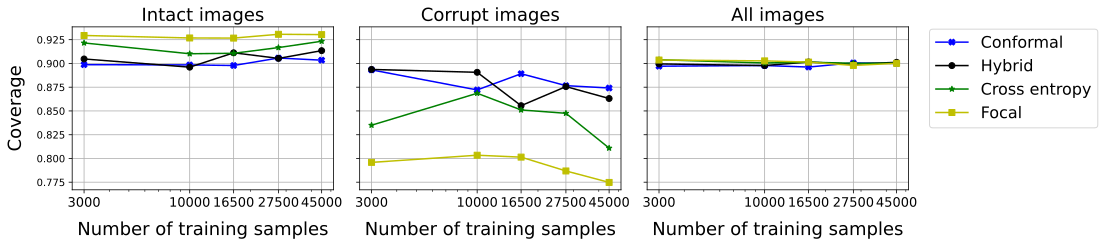

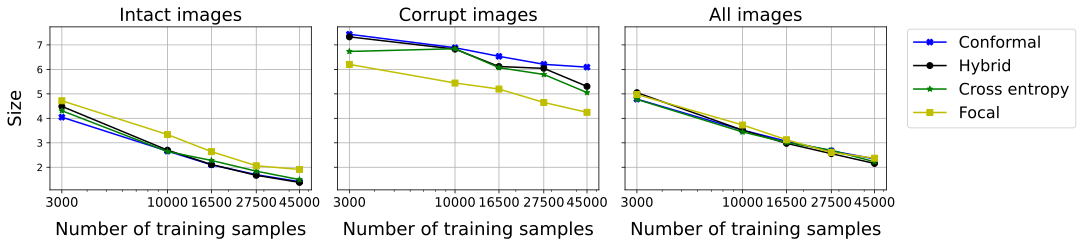

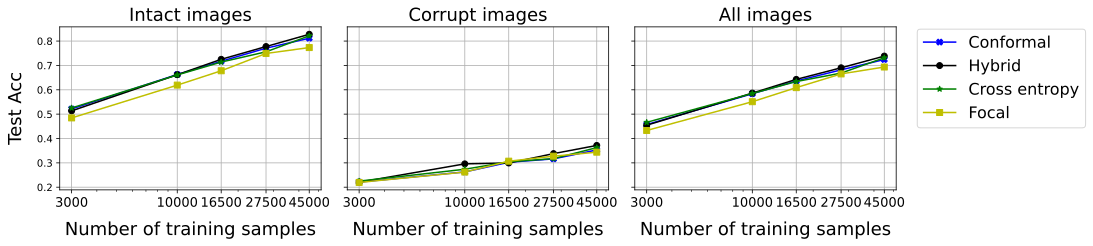

In [ ]:
plot_figure1(results_final, 'bbox_es_acc', 'ntrsamples', 'Coverage', title = 'Early stopping according to accuracy', file_name = 'es_acc_cov_p1_V4', save = True)
plot_figure1(results_final, 'bbox_es_acc', 'ntrsamples', 'Size',     title = 'Early stopping according to accuracy', file_name = 'es_acc_size_p1_V4', save = True)
plot_figure1(results_final, 'bbox_es_acc', 'ntrsamples', 'Test Acc', title = 'Early stopping according to accuracy', file_name = 'es_acc_acc_p1_V4', save = True)

#### Figure 2: Varying percentage of corrupt data in the training set

In [19]:
# Load all evaluation results
results_45000_001 = read_results(numepochs = '1000', trperc='0.01', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128',  Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_001 = read_results(numepochs = '2000', trperc='0.01', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='45000', bs = '768',  Model_name = 'Conformal', es_models = 'all', results_store = results_45000_001, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_001 = read_results(numepochs = '1000', trperc='0.01', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128',  Model_name = 'Focal', baseloss = 'focalloss', es_models = 'all', results_store = results_45000_001, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_001 = read_results(numepochs = '3000', trperc='0.01', lr = '0.001', optim = 'Adam', musize = '0.2', ntrsamples='45000', bs = '768', Model_name = 'Hybrid', es_models = 'all', results_store = results_45000_001, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])

results_45000_0025 = read_results(numepochs = '1000', trperc='0.025', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128',  Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1'])
results_45000_0025 = read_results(numepochs = '2000', trperc='0.025', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='45000', bs = '768',  Model_name = 'Conformal', es_models = 'all', results_store = results_45000_0025, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_0025 = read_results(numepochs = '1000', trperc='0.025', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128',  Model_name = 'Focal', baseloss = 'focalloss', es_models = 'all', results_store = results_45000_0025, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_0025 = read_results(numepochs = '3000', trperc='0.025', lr = '0.001', optim = 'Adam', musize = '0.2', ntrsamples='45000', bs = '768', Model_name = 'Hybrid', es_models = 'all', results_store = results_45000_0025, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])

results_45000_005 = read_results(numepochs = '1000', trperc='0.05', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128',  Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_005 = read_results(numepochs = '2000', trperc='0.05', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='45000', bs = '768',  Model_name = 'Conformal', es_models = 'all', results_store = results_45000_005, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_005 = read_results(numepochs = '1000', trperc='0.05', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128',  Model_name = 'Focal', baseloss = 'focalloss', es_models = 'all', results_store = results_45000_005, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_005 = read_results(numepochs = '3000', trperc='0.05', lr = '0.001', optim = 'Adam', musize = '0.2', ntrsamples='45000', bs = '768', Model_name = 'Hybrid', es_models = 'all', results_store = results_45000_005, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])

results_45000_01 = read_results(numepochs = '1000', trperc='0.1', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128',  Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_01 = read_results(numepochs = '2000', trperc='0.1', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='45000', bs = '768',  Model_name = 'Conformal', es_models = 'all', results_store = results_45000_01, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_01 = read_results(numepochs = '1000', trperc='0.1', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128',  Model_name = 'Focal', baseloss = 'focalloss', es_models = 'all', results_store = results_45000_01, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_01 = read_results(numepochs = '3000', trperc='0.1', lr = '0.001', optim = 'Adam', musize = '0.2', ntrsamples='45000', bs = '768', Model_name = 'Hybrid', es_models = 'all', results_store = results_45000_01, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])

results_45000_02 = read_results(numepochs = '1000', trperc='0.2', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128',  Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_02 = read_results(numepochs = '2000', trperc='0.2', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='45000', bs = '768',  Model_name = 'Conformal', es_models = 'all', results_store = results_45000_02, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_02 = read_results(numepochs = '1000', trperc='0.2', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128',  Model_name = 'Focal', baseloss = 'focalloss', es_models = 'all', results_store = results_45000_02, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])
results_45000_02 = read_results(numepochs = '3000', trperc='0.2', lr = '0.001', optim = 'Adam', musize = '0.2', ntrsamples='45000', bs = '768', Model_name = 'Hybrid', es_models = 'all', results_store = results_45000_02, calalpha='0.1', calperc='0.2', path_root = '/content/test_new', seeds=['998888', '877', '800', '76542', '4', '3', '22142', '2', '133215', '1' ])


In [20]:
results_45000_001_final = results_45000_001.groupby(['Model_renamed','Flag']).agg({'Coverage':'median',
                                                                         'Model':'first',
                                                                         'Test Acc':'median',
                                                                         'Size (mean)':'median'}).reset_index()
results_45000_001_final['ntrsamples'] = 45000
results_45000_001_final['tr_perc'] = 0.01


results_45000_0025_final = results_45000_0025.groupby(['Model_renamed','Flag']).agg({'Coverage':'median',
                                                                           'Model':'first',
                                                                           'Test Acc':'median',
                                                                           'Size (mean)':'median'}).reset_index()
results_45000_0025_final['ntrsamples'] = 45000
results_45000_0025_final['tr_perc'] = 0.025


results_45000_005_final = results_45000_005.groupby(['Model_renamed','Flag']).agg({'Coverage':'median',
                                                                           'Model':'first',
                                                                           'Test Acc':'median',
                                                                           'Size (mean)':'median'}).reset_index()
results_45000_005_final['ntrsamples'] = 45000
results_45000_005_final['tr_perc'] = 0.05


results_45000_01_final = results_45000_01.groupby(['Model_renamed','Flag']).agg({'Coverage':'median',
                                                                           'Model':'first',
                                                                           'Test Acc':'median',
                                                                           'Size (mean)':'median'}).reset_index()
results_45000_01_final['ntrsamples'] = 45000
results_45000_01_final['tr_perc'] = 0.1


results_45000_02_final = results_45000_02.groupby(['Model_renamed','Flag']).agg({'Coverage':'median',
                                                                           'Model':'first',
                                                                           'Test Acc':'median',
                                                                           'Size (mean)':'median'}).reset_index()
results_45000_02_final['ntrsamples'] = 45000
results_45000_02_final['tr_perc'] = 0.2

results_final = pd.concat([results_45000_001_final,results_45000_0025_final, results_45000_005_final, results_45000_01_final, results_45000_02_final])
results_final.Flag.replace('1.0','Corrupt images', inplace = True)
results_final.Flag.replace('0.0','Intact images', inplace = True)
results_final.Flag.replace('All','All images', inplace = True)
results_final.rename(columns = {'Size (mean)': 'Size'}, inplace = True)

results_final

,Model_renamed,Flag,Coverage,Model,Test Acc,Size,ntrsamples,tr_perc
0,Conformal,Intact images,0.894550,bbox,0.810500,1.363200,45000,0.01
1,Conformal,Corrupt images,0.934800,bbox,0.334500,7.058200,45000,0.01
2,Conformal,All images,0.903100,bbox,0.714500,2.506600,45000,0.01
3,Conformal_ES_acc,Intact images,0.900800,bbox_es_acc,0.811100,1.420550,45000,0.01
4,Conformal_ES_acc,Corrupt images,0.918750,bbox_es_acc,0.314400,6.883150,45000,0.01
...,...,...,...,...,...,...,...,...
31,Hybrid_ES_acc,Corrupt images,0.861083,bbox_es_acc,0.365095,5.379137,45000,0.20
32,Hybrid_ES_acc,All images,0.901900,bbox_es_acc,0.734100,2.191100,45000,0.20
33,Hybrid_ES_loss,Intact images,0.912690,bbox_es_loss,0.813765,1.400699,45000,0.20
34,Hybrid_ES_loss,Corrupt images,0.853561,bbox_es_loss,0.357071,5.767803,45000,0.20


In [21]:
def plot_figure2(df, model, x, y, title, file_name = None, save = False):

  font_size = 18
  tick_size = 13
  lab_pad = 12

  df_sub = df.loc[df['Model'] == model]
  df_sub.loc[df_sub['Model_renamed'].str.contains('Cross-Entropy'), 'Model_renamed'] = 'Cross entropy'
  df_sub.loc[df_sub['Model_renamed'].str.contains('Conformal'), 'Model_renamed'] = 'Conformal'
  df_sub.loc[df_sub['Model_renamed'].str.contains('Focal'), 'Model_renamed'] = 'Focal'
  df_sub.loc[df_sub['Model_renamed'].str.contains('Hybrid'), 'Model_renamed'] = 'Hybrid'

  Easy = df_sub[df_sub['Flag']== 'Intact images']
  Hard = df_sub[df_sub['Flag']== 'Corrupt images']
  All = df_sub[df_sub['Flag']== 'All images']

  fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey = 'row')
  ax[0].plot(Easy[Easy['Model_renamed'] == 'Conformal'][x], Easy[Easy['Model_renamed'] == 'Conformal'][y], 'X-b', label='Conformal')
  ax[0].plot(Easy[Easy['Model_renamed'] == 'Hybrid'][x], Easy[Easy['Model_renamed'] == 'Hybrid'][y], 'o-k', label='Hybrid')
  ax[0].plot(Easy[Easy['Model_renamed'] == 'Cross entropy'][x], Easy[Easy['Model_renamed'] == 'Cross entropy'][y], '*-g', label='Cross entropy')
  ax[0].plot(Easy[Easy['Model_renamed'] == 'Focal'][x], Easy[Easy['Model_renamed'] == 'Focal'][y], 's-y', label='Focal')


  ax[1].plot(Hard[Hard['Model_renamed'] == 'Conformal'][x], Hard[Hard['Model_renamed'] == 'Conformal'][y], 'X-b', label='Conformal')
  ax[1].plot(Hard[Hard['Model_renamed'] == 'Hybrid'][x], Hard[Hard['Model_renamed'] == 'Hybrid'][y], 'o-k', label='Hybrid')
  ax[1].plot(Hard[Hard['Model_renamed'] == 'Cross entropy'][x], Hard[Hard['Model_renamed'] == 'Cross entropy'][y], '*-g', label='Cross entropy')
  ax[1].plot(Hard[Hard['Model_renamed'] == 'Focal'][x], Hard[Hard['Model_renamed'] == 'Focal'][y], 's-y', label='Focal')


  ax[2].plot(All[All['Model_renamed'] == 'Conformal'][x], All[All['Model_renamed'] == 'Conformal'][y], 'X-b', label='Conformal')
  ax[2].plot(All[All['Model_renamed'] == 'Hybrid'][x], All[All['Model_renamed'] == 'Hybrid'][y], 'o-k', label='Hybrid')
  ax[2].plot(All[All['Model_renamed'] == 'Cross entropy'][x], All[All['Model_renamed'] == 'Cross entropy'][y], '*-g', label='Cross entropy')
  ax[2].plot(All[All['Model_renamed'] == 'Focal'][x], All[All['Model_renamed'] == 'Focal'][y], 's-y', label='Focal')

  ax[0].set_title('Intact images', fontsize=font_size)
  ax[1].set_title('Corrupt images', fontsize=font_size)
  ax[2].set_title('All images', fontsize=font_size)

  ax[0].set_xlabel('Number of training samples', fontsize=font_size, labelpad= lab_pad)
  ax[0].set_ylabel(y, fontsize=font_size, labelpad= lab_pad)
  ax[0].set_xscale('log')
  ax[0].set_xticks([0.01, 0.025, 0.05, 0.1, 0.2])
  ax[0].legend().set_visible(False)
  ax[0].set_xticklabels(['0.01', '0.025', '0.05', '0.1', '0.2'], fontsize = tick_size)
  ax[0].grid()
  # ax[0].tick_params(axis='x', which='major', pad=15)

  ax[1].set_xlabel('Number of training samples', fontsize=font_size, labelpad= lab_pad)
  ax[1].set_xscale('log')
  ax[1].set_xticks([0.01, 0.025, 0.05, 0.1, 0.2])
  ax[1].set_xticklabels(['0.01', '0.025', '0.05', '0.1', '0.2'], fontsize = tick_size)
  ax[1].grid()

  ax[2].set_xlabel('Number of training samples', fontsize=font_size, labelpad= lab_pad)
  ax[2].set_xscale('log')
  ax[2].set_xticks([0.01, 0.025, 0.05, 0.1, 0.2])
  ax[2].set_xticklabels(['0.01', '0.025', '0.05', '0.1', '0.2'], fontsize = tick_size)
  ax[2].legend()
  ax[2].grid()

  # fig.tight_layout()

  plt.subplots_adjust(wspace=0.1, hspace=2)
  plt.legend(bbox_to_anchor =(1.05, 1.035), fontsize = font_size-2)

  if save:
    filename = file_name + '.pdf'
    plt.savefig( filename, bbox_inches = 'tight')

  fig.show()

##### on Fully-Trained Models

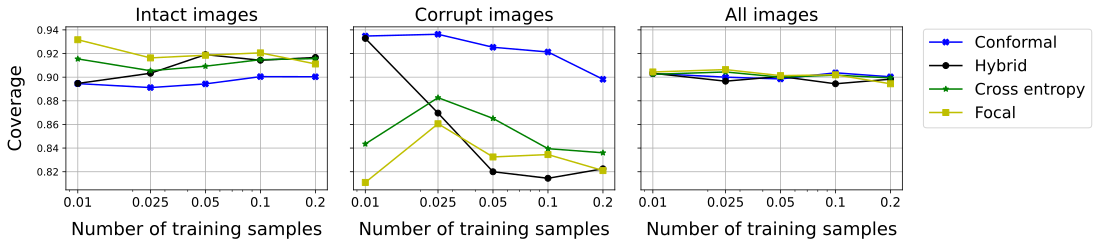

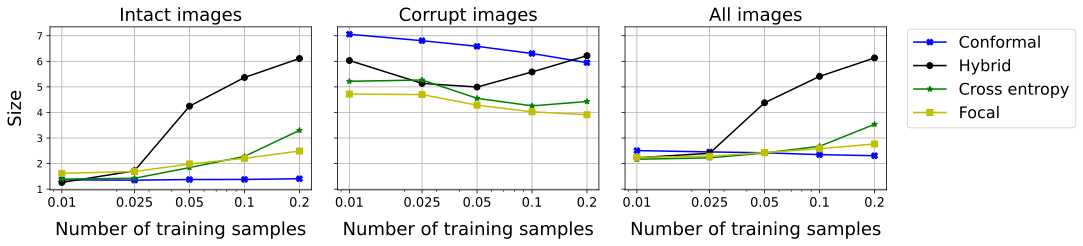

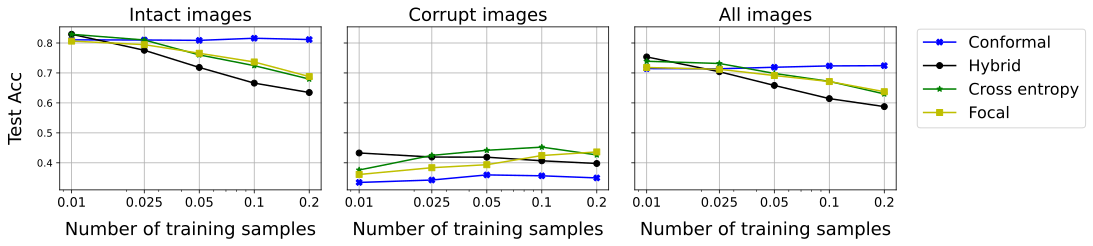

In [ ]:
plot_figure2(results_final, 'bbox', 'tr_perc', 'Coverage', title = 'Fully trained models', file_name = 'full_cov_p2_V4', save = True)
plot_figure2(results_final, 'bbox', 'tr_perc', 'Size',     title = 'Fully trained models', file_name = 'full_size_p2_V4', save = True)
plot_figure2(results_final, 'bbox', 'tr_perc', 'Test Acc', title = 'Fully trained models', file_name = 'full_acc_p2_V4', save = True)

##### on Early-Stopping (according to accuracy) models

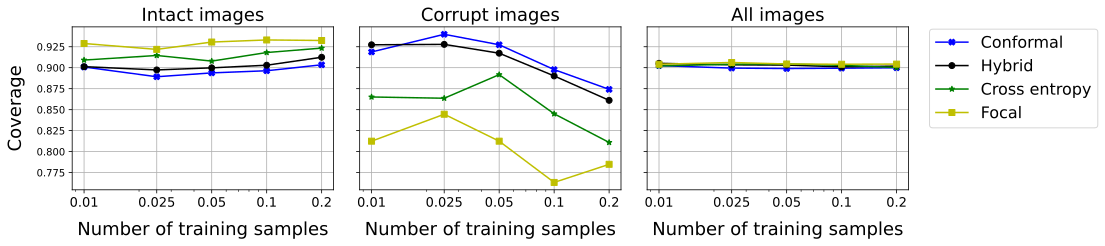

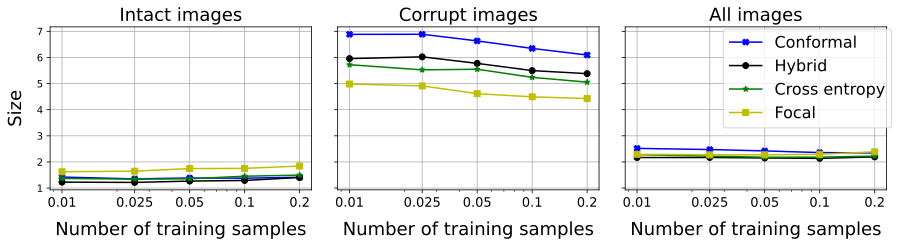

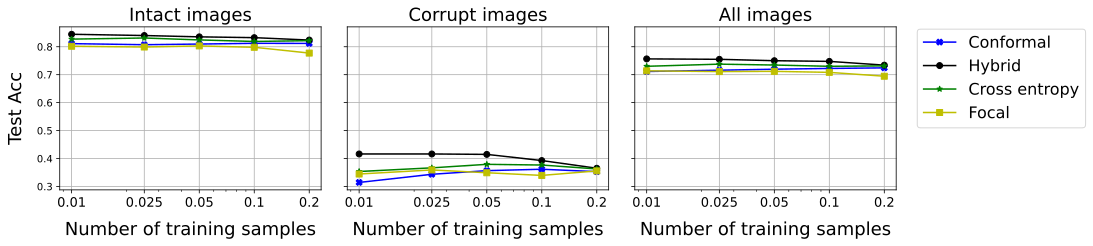

In [ ]:
plot_figure2(results_final, 'bbox_es_acc', 'tr_perc', 'Coverage', title = 'Early stopping according to accuracy', file_name = 'es_acc_cov_p2_V4', save = True)
plot_figure2(results_final, 'bbox_es_acc', 'tr_perc', 'Size',     title = 'Early stopping according to accuracy', file_name = 'es_acc_size_p2_V4', save = True)
plot_figure2(results_final, 'bbox_es_acc', 'tr_perc', 'Test Acc', title = 'Early stopping according to accuracy', file_name = 'es_acc_acc_p2_V4', save = True)

#### Figure 3: Conformity scores on the test data

In [24]:
def plot_figure3_bycols(ntrsamples='45000', model = 'bbox', seed = '800', save_fig = False, file_name = 'conformity_score_plot',y_lim_manual=2500):

  pad_size = 15
  if ntrsamples == '45000':
    scores_ce_singlemodel = read_confs(numepochs = '1000', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128', trperc='0.2', Model_name = 'Cross-Entropy', calalpha='0.1', calperc='0.2', path_root = '/content/test_conf',seeds = seed)
    scores_focal_singlemodel = read_confs(numepochs = '1000', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128', trperc='0.2', Model_name = 'Focal', baseloss = 'focalloss', calalpha='0.1', calperc='0.2', path_root = '/content/test_conf',seeds = seed)
    scores_hybrid_singlemodel = read_confs(numepochs = '3000', lr = '0.001', optim = 'Adam', mu = '0.0', ntrsamples='45000',musize= '0.2', bs = '768', trperc='0.2', Model_name = 'Hybrid', calalpha='0.1', calperc='0.2', path_root = '/content/test_conf',seeds = seed)
    scores_conformal_singlemodel = read_confs(numepochs = '2000', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='45000',musize= '0.0', bs = '768', trperc='0.2', Model_name = 'Conformal', calalpha='0.1', calperc='0.2', path_root = '/content/test_conf',seeds = seed)

  if ntrsamples == '3000':
    scores_ce_singlemodel = read_confs(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='3000', bs = '128', trperc='0.2', Model_name = 'Cross-Entropy', calalpha='0.1', calperc='0.2', path_root = '/content/test_conf',seeds = seed)
    scores_focal_singlemodel = read_confs(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='3000', bs = '128', trperc='0.2', Model_name = 'Focal', baseloss = 'focalloss', calalpha='0.1',calperc='0.2', path_root = '/content/test_conf',seeds = seed)
    scores_hybrid_singlemodel = read_confs(numepochs = '5000', lr = '0.001', optim = 'Adam', mu = '0.0', ntrsamples='3000',musize= '0.2', bs = '768', trperc='0.2', Model_name = 'Hybrid', calalpha='0.1', calperc='0.2', path_root = '/content/test_conf',seeds = seed)
    scores_conformal_singlemodel = read_confs(numepochs = '5000', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='3000',musize= '0.0', bs = '768', trperc='0.2', Model_name = 'Conformal', calalpha='0.1', calperc='0.2', path_root = '/content/test_conf',seeds = seed)

  # Plot the distribution of oracle conformity scores on test data
  fig=plt.figure(figsize=(13, 16))
  # fig.suptitle('Conformity scores on test set')
  plt.rcParams['font.size'] = '13'

  plt.subplot(4, 3, 1)
  plt.hist(scores_conformal_singlemodel[model]['conformity_scores_0.0'], color = "blue", bins=20)
  plt.ylim([0,y_lim_manual])
  plt.ylabel('Conformal')
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])
  plt.title("Intact images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_conformal_singlemodel[model]['conformity_scores_0.0']), cvm(scores_conformal_singlemodel[model]['conformity_scores_0.0']), KS(scores_conformal_singlemodel[model]['conformity_scores_0.0'])), pad=pad_size)
  plt.subplot(4, 3, 2)
  plt.hist(scores_conformal_singlemodel[model]['conformity_scores_1.0'], color = "blue", bins=20)
  plt.ylim([0,y_lim_manual])
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])
  plt.title("Corrupt images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_conformal_singlemodel[model]['conformity_scores_1.0']), cvm(scores_conformal_singlemodel[model]['conformity_scores_1.0']), KS(scores_conformal_singlemodel[model]['conformity_scores_1.0'])), pad=pad_size)
  plt.subplot(4, 3, 3)
  plt.hist(scores_conformal_singlemodel[model]['conformity_scores_All'], color = "blue", bins=20)
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])
  plt.title("All images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_conformal_singlemodel[model]['conformity_scores_All']), cvm(scores_conformal_singlemodel[model]['conformity_scores_All']), KS(scores_conformal_singlemodel[model]['conformity_scores_All'])), pad=pad_size)
  plt.ylim([0,y_lim_manual])

  plt.subplot(4, 3, 4)
  plt.hist(scores_hybrid_singlemodel[model]['conformity_scores_0.0'], color = "black", bins=20)
  plt.ylim([0,y_lim_manual])
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])
  plt.ylabel('Hybrid')
  plt.title("Intact images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_hybrid_singlemodel[model]['conformity_scores_0.0']), cvm(scores_hybrid_singlemodel[model]['conformity_scores_0.0']), KS(scores_hybrid_singlemodel[model]['conformity_scores_0.0'])), pad=pad_size)
  plt.subplot(4, 3, 5)
  plt.hist(scores_hybrid_singlemodel[model]['conformity_scores_1.0'], color = "black", bins=20)
  plt.ylim([0,y_lim_manual])
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])
  plt.title("Corrupt images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_hybrid_singlemodel[model]['conformity_scores_1.0']), cvm(scores_hybrid_singlemodel[model]['conformity_scores_1.0']), KS(scores_hybrid_singlemodel[model]['conformity_scores_1.0'])), pad=pad_size)
  plt.subplot(4, 3, 6)
  plt.hist(scores_hybrid_singlemodel[model]['conformity_scores_All'], color = "black", bins=20)
  plt.title("All images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_hybrid_singlemodel[model]['conformity_scores_All']), cvm(scores_hybrid_singlemodel[model]['conformity_scores_All']), KS(scores_hybrid_singlemodel[model]['conformity_scores_All'])), pad=pad_size)
  plt.ylim([0,y_lim_manual])
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])

  plt.subplot(4, 3, 7)
  plt.hist(scores_ce_singlemodel[model]['conformity_scores_0.0'], color = "green", bins=20)
  plt.ylim([0,y_lim_manual])
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])
  plt.ylabel('Cross entropy')
  plt.title("Intact images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_ce_singlemodel[model]['conformity_scores_0.0']), cvm(scores_ce_singlemodel[model]['conformity_scores_0.0']), KS(scores_ce_singlemodel[model]['conformity_scores_0.0'])), pad=pad_size)
  plt.subplot(4, 3, 8)
  plt.hist(scores_ce_singlemodel[model]['conformity_scores_1.0'], color = "green", bins=20)
  plt.ylim([0,y_lim_manual])
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])
  plt.title("Corrupt images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_ce_singlemodel[model]['conformity_scores_1.0']), cvm(scores_ce_singlemodel[model]['conformity_scores_1.0']), KS(scores_ce_singlemodel[model]['conformity_scores_1.0'])), pad=pad_size)
  plt.subplot(4, 3, 9)
  plt.hist(scores_ce_singlemodel[model]['conformity_scores_All'], color = "green", bins=20)
  plt.title("All images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_ce_singlemodel[model]['conformity_scores_All']), cvm(scores_ce_singlemodel[model]['conformity_scores_All']), KS(scores_ce_singlemodel[model]['conformity_scores_All'])), pad=pad_size)
  plt.ylim([0,y_lim_manual])
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])

  plt.subplot(4, 3, 10)
  plt.hist(scores_focal_singlemodel[model]['conformity_scores_0.0'], color = "y", bins=20)
  plt.ylim([0,y_lim_manual])
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])
  plt.ylabel('Focal')
  plt.title("Intact images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_focal_singlemodel[model]['conformity_scores_0.0']), cvm(scores_focal_singlemodel[model]['conformity_scores_0.0']), KS(scores_focal_singlemodel[model]['conformity_scores_0.0'])), pad=pad_size)
  plt.subplot(4, 3, 11)
  plt.hist(scores_focal_singlemodel[model]['conformity_scores_1.0'], color = "y", bins=20)
  plt.ylim([0,y_lim_manual])
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])
  plt.title("Corrupt images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_focal_singlemodel[model]['conformity_scores_1.0']), cvm(scores_focal_singlemodel[model]['conformity_scores_1.0']), KS(scores_focal_singlemodel[model]['conformity_scores_1.0'])), pad=pad_size)
  plt.subplot(4, 3, 12)
  plt.hist(scores_focal_singlemodel[model]['conformity_scores_All'], color = "y", bins=20)
  plt.title("All images \n (n {:d}, CVM {:.2f}, KS {:.2f})".format(len(scores_focal_singlemodel[model]['conformity_scores_All']), cvm(scores_focal_singlemodel[model]['conformity_scores_All']), KS(scores_focal_singlemodel[model]['conformity_scores_All'])), pad=pad_size)
  plt.ylim([0,y_lim_manual])
  plt.xticks([0, 0.2,0.4,0.6,0.8,1])


  # plt.tight_layout()
  plt.subplots_adjust(wspace=0.4, hspace=0.6)
  if save_fig:
    filename = file_name + '.pdf'
    plt.savefig( filename, bbox_inches = 'tight')


  plt.show()

##### on Fully-Trained Models

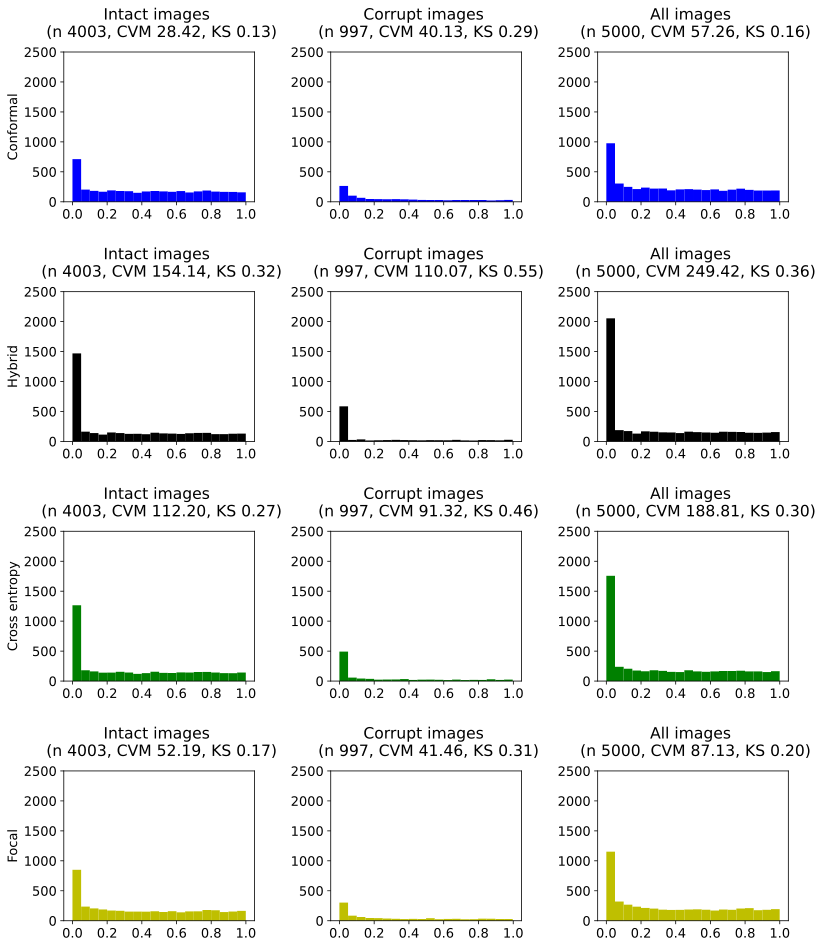

In [29]:
plot_figure3_bycols(ntrsamples='45000', seed = '800', file_name = 'full_45000_p3_V4', save_fig = True)

##### on Early-Stopping (according to accuracy) models

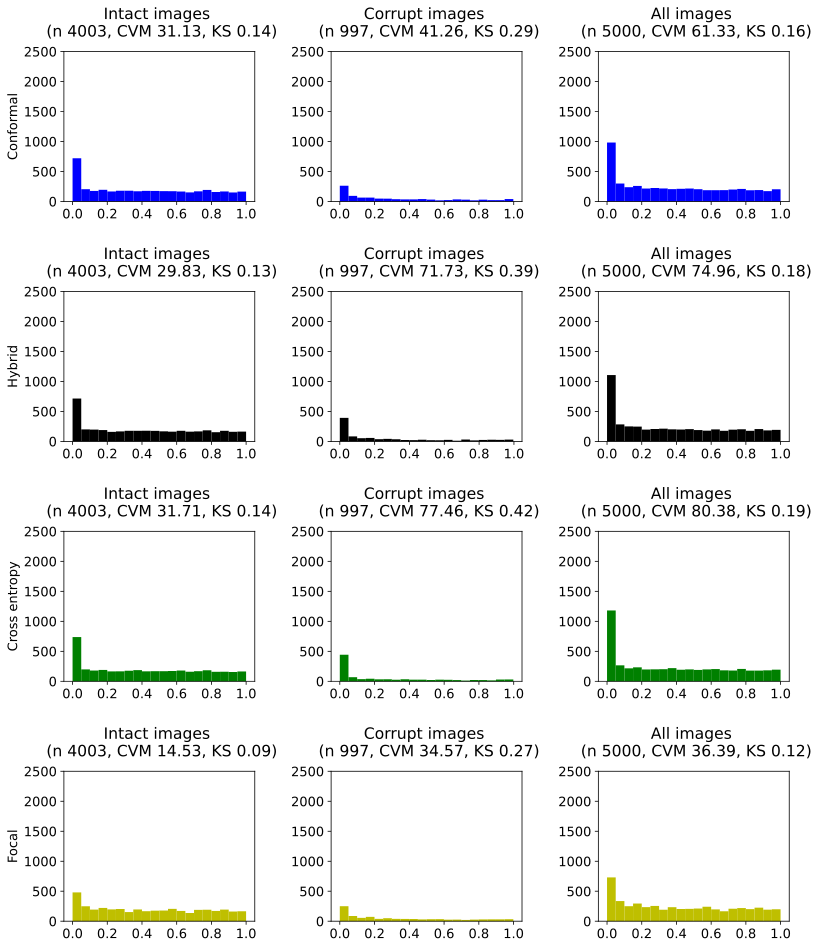

In [30]:
plot_figure3_bycols(ntrsamples='45000', seed = '800', file_name = 'es_acc_45000_p3_V4', model = 'bbox_es_acc', save_fig = True)

#### Figure 4: When conditioning on true label

In [3]:
results_3000 = read_results(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='3000', bs = '128', trperc='0.2', Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2', alter_name = 'by_label', path_root = '/content/test_lf', seeds=['998888', '800', '877', '133215', '22142', '2333', '76542', '765183', '87658', '1325'])
results_3000 = read_results(numepochs = '1500', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='3000', bs = '128', trperc='0.2', Model_name = 'Focal',baseloss = 'focalloss', es_models = 'all', results_store = results_3000, calalpha='0.1', calperc='0.2',alter_name = 'by_label',  path_root = '/content/test_lf', seeds=['998888', '800', '877', '133215', '22142', '2333', '76542', '765183', '87658', '1325'])
results_3000 = read_results(numepochs = '5000', lr = '0.001', optim = 'Adam', mu = '0.0', ntrsamples='3000',musize= '0.2', bs = '768', trperc='0.2', Model_name = 'Hybrid', es_models = 'all', results_store = results_3000, calalpha='0.1', calperc='0.2',alter_name = 'by_label', path_root = '/content/test_lf', seeds=['998888', '800', '877', '133215', '22142', '2333', '76542', '765183', '87658', '1325'])
results_3000 = read_results(numepochs = '5000', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='3000',musize= '0.0', bs = '768', trperc='0.2', Model_name = 'Conformal', es_models = 'all', results_store = results_3000, calalpha='0.1', calperc='0.2',alter_name = 'by_label', path_root = '/content/test_lf', seeds=['998888', '800', '877', '133215', '22142', '2333', '76542', '765183', '87658', '1325'])

results_45000 = read_results(numepochs = '1000', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128', trperc='0.2', Model_name = 'Cross-Entropy', es_models = 'all', results_store = None, calalpha='0.1', calperc='0.2',alter_name = 'by_label',  path_root = '/content/test_lf', seeds=['998888', '800', '877', '133215', '22142', '1', '76542', '2', '3', '4'])
results_45000 = read_results(numepochs = '1000', lr = '0.1', optim = 'SGD', mu = '0.0', ntrsamples='45000', bs = '128', trperc='0.2', Model_name = 'Focal',baseloss = 'focalloss', es_models = 'all', results_store = results_45000, calalpha='0.1', calperc='0.2',alter_name = 'by_label',  path_root = '/content/test_lf', seeds=['998888', '800', '877', '133215', '22142', '1', '76542', '2', '3', '4'])
results_45000 = read_results(numepochs = '3000', lr = '0.001', optim = 'Adam', mu = '0.0', ntrsamples='45000',musize= '0.2', bs = '768', trperc='0.2', Model_name = 'Hybrid', es_models = 'all', results_store = results_45000, calalpha='0.1', calperc='0.2',alter_name = 'by_label', path_root = '/content/test_lf', seeds=['998888', '800', '877', '133215', '22142', '1', '76542', '2', '3', '4'])
results_45000 = read_results(numepochs = '2000', lr = '0.001', optim = 'Adam', mu = '0.1', ntrsamples='45000',musize= '0.0', bs = '768', trperc='0.2', Model_name = 'Conformal', es_models = 'all', results_store = results_45000, calalpha='0.1', calperc='0.2',alter_name = 'by_label', path_root = '/content/test_lf', seeds=['998888', '800', '877', '133215', '22142', '1', '76542', '2', '3', '4'])

results_3000.Flag.replace('1.0','Corrupt images', inplace = True)
results_3000.Flag.replace('0.0','Intact images', inplace = True)
results_3000.Flag.replace('All','All images', inplace = True)
results_3000.rename(columns = {'Size (mean)': 'Size'}, inplace = True)

results_45000.Flag.replace('1.0','Corrupt images', inplace = True)
results_45000.Flag.replace('0.0','Intact images', inplace = True)
results_45000.Flag.replace('All','All images', inplace = True)
results_45000.rename(columns = {'Size (mean)': 'Size'}, inplace = True)

In [6]:
def plot_figure5(df, model, x, y, title, save = False, file_name = None):

  df_sub = df.loc[df['Model'] == model]
  df_sub.loc[df_sub['Model_renamed'].str.contains('Cross-Entropy'), 'Model_renamed'] = 'Cross entropy'
  df_sub.loc[df_sub['Model_renamed'].str.contains('Uniform-Matching'), 'Model_renamed'] = 'Conformal'
  df_sub.loc[df_sub['Model_renamed'].str.contains('Focal'), 'Model_renamed'] = 'Focal'
  df_sub.loc[df_sub['Model_renamed'].str.contains('Hybrid'), 'Model_renamed'] = 'Hybrid'

  fig = px.box(df_sub, x=x, y=y, color="Model_renamed", facet_row="Flag", # facet_row_spacing=0.05, #color_discrete_sequence=px.colors.qualitative.G10) #, facet_col_spacing=0.05
                color_discrete_sequence=["#0000ff", "#000000", "#55a868", "#ccb974"], 
                category_orders={'Model_renamed':['Conformal','Hybrid','Cross entropy', 'Focal'],
                                 'Flag':['Intact images','Corrupt images', 'All images']})
  fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
  fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey', showline=True, linecolor='black', mirror=True)
  fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey', showline=True, linecolor='black', mirror=True)
  fig.update_layout(plot_bgcolor = "white",
                    font = dict(size = 15,color = "Black"),
                    autosize=False,width=1300,height=1000, title = title,
                    xaxis1 = dict(tickmode = 'array',tickvals = [0, 1, 2, 3, 4, 5,6,7,8,9], ticktext = [0, 1, 2, 3, 4, 5,6,7,8,9], title = 'True label'),
                    xaxis2 = dict(tickmode = 'array',tickvals = [0, 1, 2, 3, 4, 5,6,7,8,9], ticktext = [0, 1, 2, 3, 4, 5,6,7,8,9]), #, title = 'True label'
                    xaxis3 = dict(tickmode = 'array',tickvals = [0, 1, 2, 3, 4, 5,6,7,8,9], ticktext = [0, 1, 2, 3, 4, 5,6,7,8,9]),#, title = 'True label'
                    legend=dict(bordercolor="Lightgrey",borderwidth=1, title = None))
                    # # legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01),
                    # legend_title_text= 'Models')

  if save:
    # fig.write_image("{}.pdf".format(file_name))
    plotly.io.write_image(fig, "{}.pdf".format(file_name), format='pdf')

  # newnames = {'Cross-Entropy':'Cross entropy', 'Focal':'Focal', 'Hybrid':'Hybrid','Uniform-Matching': 'Conformal'}
  # fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
  #                                       legendgroup = newnames[t.name],
  #                                       hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
  fig.show()

##### on Fully-Trained Models

In [8]:
plot_figure5(results_45000, 'bbox', 'Label', 'Coverage', title = 'Results by true labels on fully trained models models')
plot_figure5(results_45000, 'bbox', 'Label', 'Size', title = 'Results by true labels on fully trained models models')
plot_figure5(results_45000, 'bbox', 'Label', 'Test Acc', title = 'Results by true labels on fully trained models models')

##### on Early-Stopping (according to accuracy) models

In [9]:
plot_figure5(results_45000, 'bbox_es_acc', 'Label', 'Coverage', title = 'Results by true labels on es accuracy models')
plot_figure5(results_45000, 'bbox_es_acc', 'Label', 'Size', title = 'Results by true labels on es accuracy models')
plot_figure5(results_45000, 'bbox_es_acc', 'Label', 'Test Acc', title = 'Results by true labels on es accuracy models')